In [3]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import pyro
import pyro.distributions as dist
from model_pyro import model,guide

In [4]:
data = []
for i in range(200):
    if i < 60:
        data.append(int(np.random.random(1)*3+50))
    else:
        data.append(int(np.random.random(1)*1+80))

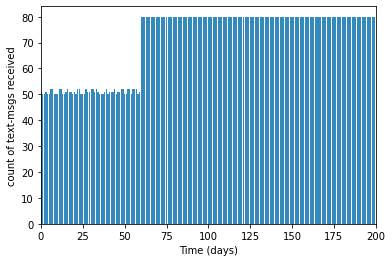

In [6]:
from plot import plot
plot(data)

In [4]:
adam = pyro.optim.Adam({"lr": 0.02}) 
elbo = pyro.infer.Trace_ELBO()
svi = pyro.infer.SVI(model, guide, adam, elbo)

In [5]:
losses = []
for step in range(10000):  # Consider running for more steps.
    loss = svi.step(torch.tensor(data))
    losses.append(loss)
    if step % 1000 == 0:
        print("Elbo loss: {}".format(loss))
        

Elbo loss: 72308.96681411081
Elbo loss: 1208.851916893991
Elbo loss: 912.839887180074
Elbo loss: 1425.3584649554707
Elbo loss: 897.0833220483413
Elbo loss: 778.601099351425
Elbo loss: 838.0605080045835
Elbo loss: 837.7570572841646
Elbo loss: 859.2118353511132
Elbo loss: 783.3821103674397


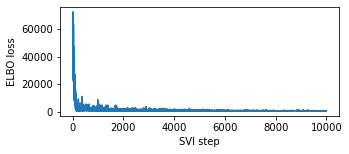

In [6]:
plt.figure(figsize=(5, 2))
plt.plot(losses)
plt.xlabel("SVI step")
plt.ylabel("ELBO loss");

In [7]:
pi= pyro.param("pi").data.cpu().numpy()

In [8]:
from scipy.special import softmax
prob=softmax(pi)

In [9]:
for i in range(len(prob)):
    print(i,prob[i])

0 1.0555261e-05
1 7.04015e-06
2 5.607779e-05
3 9.70833e-06
4 0.00010484607
5 5.2916334e-06
6 3.5449893e-06
7 1.4611142e-05
8 1.2647518e-05
9 1.6380869e-06
10 3.877437e-05
11 4.5026092e-05
12 5.322979e-06
13 1.131379e-05
14 0.0005118261
15 1.6743868e-05
16 4.7367266e-06
17 5.4365855e-06
18 0.00073483074
19 3.2412945e-06
20 9.491635e-06
21 2.7600048e-05
22 3.0570855e-06
23 7.342629e-06
24 0.00025437356
25 2.691648e-05
26 2.2915288e-05
27 1.8063978e-05
28 2.8938412e-06
29 8.953547e-06
30 2.4591138e-06
31 3.5926273e-06
32 2.0980055e-05
33 3.236919e-05
34 2.1181539e-05
35 0.00026739854
36 3.5456538e-05
37 2.4655352e-05
38 2.58258e-05
39 7.725805e-06
40 8.5468355e-06
41 1.0139653e-05
42 2.084928e-06
43 5.8408154e-06
44 3.864614e-06
45 3.9748465e-05
46 2.0667665e-06
47 3.1845873e-05
48 1.9867344e-05
49 8.848252e-05
50 0.0021169202
51 6.657621e-06
52 4.2674797e-05
53 5.468821e-06
54 6.338541e-05
55 5.5178934e-06
56 5.0493916e-05
57 5.3664985e-06
58 4.698442e-05
59 6.173886e-06
60 2.1121677e-06

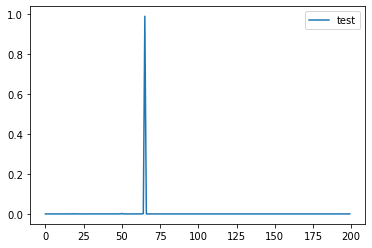

In [10]:
import matplotlib.pyplot as plt
# データ生成


# プロット
plt.plot(prob, label="test")

# 凡例の表示
plt.legend()

# プロット表示(設定の反映)
plt.show()

In [11]:
a1=pyro.param("a1").data.cpu().numpy()
b1=pyro.param("b1").data.cpu().numpy()

In [12]:
print(a1,b1)

211.23458962662795 4.148864828805121


In [13]:
a2=pyro.param("a2").data.cpu().numpy()
b2=pyro.param("b2").data.cpu().numpy()

In [14]:
print(a2,b2)

385.41297644368046 4.9312085492256115
